$\Large\textbf{Welcome to IE 684 (Spring 2021-22)}$  

$\large\textbf{Lab 1 Exercise 1. }$

We will start with a procedure which helps to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

Note that the gradient of $f(\mathbf{x})$ is given by:

$
\nabla f(\mathbf{x}) = \begin{bmatrix} \frac{\partial f(\mathbf{x})}{\partial x_1} \\ \frac{\partial f(\mathbf{x})}{\partial x_2}\end{bmatrix}. 
$

We will use the following gradient descent type algorithm: 

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$, Steplength $\eta$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}


In [1]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [2]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray 
  assert len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [3]:
#check whether you can pass arbitrary arguments to evalf 
my_x = np.array([1,3]) #Note: my_x is a list of 2 elements, but not a numpy array
print('f(my_x) is:',evalf(my_x))

f(my_x) is: 10685


In [4]:
# First we will create a numpy array of size 2
my_x = np.array([1,2])
print('type of my_x',type(my_x), 'length of my_x:',len(my_x)) #verify if my_x is indeed a numpy array of size 2


type of my_x <class 'numpy.ndarray'> length of my_x: 2


In [5]:
#now call evalf (x) with my_x as argument and check if it works
print(evalf(my_x))

10730


In [6]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [7]:
def find_minimizer(start_x, tol, step_length):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))
    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, fvals,k 


In [8]:
my_start_x = np.array([10,10])
my_steplength = 0.1
my_tol= 1e-3 #10^{-3} or 0.001
opt_x, fvals_ret,_ = find_minimizer(my_start_x, my_tol, my_steplength)
print('Optimizer:',opt_x)

Optimizer: [-99.99958844  24.99994388]


In [9]:
optimum_x = np.array([-99.99958844,24.99994388])
evalf(optimum_x)

1.725310880028136e-07

2. [R] What is the minimizer and minimum function value of $f(x) = f(x_1, x_2) = (x_1 + 100)^2 + (x_2 − 25)^2$?

Solution: We can see from the algorithm the iteration stopped at values

x: [-99.99958844  24.99994388]  f(x): 1.7253033717248775e-07 

if we do more iterations we will get the following answers

~ [-100,25]  and minimum value is ~ 0







3. [R] With starting point $x_
0$ = (10, 10) and η = 0.1, we will now study the behavior of the algorithm for different
tolerance values. Try τ = $10^{−p}$ where p = 1, 2, . . . , 10. For each τ , record the final minimizer, final objective
function value and number of iterations taken by the algorithm to terminate. Prepare a plot where the number
of iterations is plotted against τ values. Comment on the observations. Comment about the minimizers and
objective function values obtained for different choices of the tolerance values.


Solution:

* For t - value 10^-1 : minimizer:[-99.9553787   24.99391528],objective function value 0.0020280843668995063,No of iterations taken 35
* For t - value 10^-2 : minimizer:[-99.99520882  24.99934666],objective function value 2.3382220797474075e-05,No of iterations taken 45
* For t - value 10^-3 : minimizer:[-99.99958844  24.99994388],objective function value 1.7253033717248775e-07,No of iterations taken 56
* For t - value 10^-4 : minimizer:[-99.99995581  24.99999397],objective function value 1.989139359193299e-09,No of iterations taken 66
* For t - value 10^-5 : minimizer:[-99.99999526  24.99999935],objective function value 2.293321544605827e-11,No of iterations taken 76
* For t - value 10^-6 : minimizer:[-99.99999959  24.99999994],objective function value 1.6921726745458407e-13,No of iterations taken 87
* For t - value 10^-7 : minimizer:[-99.99999996  24.99999999],objective function value 1.950942200128245e-15,No of iterations taken 97
* For t - value 10^-8 : minimizer:[-100.   25.],objective function value 2.249273021138356e-17,No of iterations taken 107
* For t - value 10^-9 : minimizer:[-100.   25.],objective function value 1.6597088735501767e-19,No of iterations taken 118
* For t - value 10^-10 : minimizer:[-100.   25.],objective function value 1.9135732950098918e-21,No of iterations taken 128

In [10]:
start_x = np.array([10,10])
steplength = 0.1
t_values = []
no_of_iter = []
for i in range(1,11):
  t = (10)**(-i)
  x,f,k= find_minimizer(start_x,t,steplength)
  t_values.append(t)
  no_of_iter.append(k)
  print(f"* For t - value 10^{-i} : minimizer:{x},objective function value {evalf(x)},No of iterations taken {k}")
 

* For t - value 10^-1 : minimizer:[-99.9553787   24.99391528],objective function value 0.0020280843668995063,No of iterations taken 35
* For t - value 10^-2 : minimizer:[-99.99520882  24.99934666],objective function value 2.3382220797474075e-05,No of iterations taken 45
* For t - value 10^-3 : minimizer:[-99.99958844  24.99994388],objective function value 1.7253033717248775e-07,No of iterations taken 56
* For t - value 10^-4 : minimizer:[-99.99995581  24.99999397],objective function value 1.989139359193299e-09,No of iterations taken 66
* For t - value 10^-5 : minimizer:[-99.99999526  24.99999935],objective function value 2.293321544605827e-11,No of iterations taken 76
* For t - value 10^-6 : minimizer:[-99.99999959  24.99999994],objective function value 1.6921726745458407e-13,No of iterations taken 87
* For t - value 10^-7 : minimizer:[-99.99999996  24.99999999],objective function value 1.950942200128245e-15,No of iterations taken 97
* For t - value 10^-8 : minimizer:[-100.   25.],obje

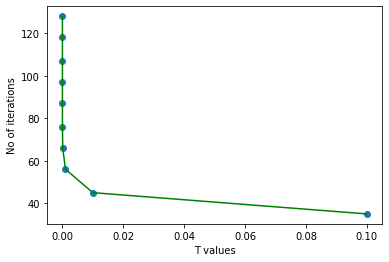

In [11]:
plt.plot(t_values,no_of_iter,color = "g")
plt.scatter(x=t_values,y = no_of_iter)
plt.xlabel("T values")
plt.ylabel("No of iterations");

Question 3 : 

Observations : We can see from the graph the as t value is divided by 10 every time the no of iterations increased by 10-11 (approximately).which directly implies increasing t values no of iterations are decreasing

4. [R] With starting point x
0 = (10, 10) and τ = 10−5
, we will study the behavior of the algorithm for different
step length values. Try η ∈ {0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9}. For each η, record the final
minimizer, final objective function value and number of iterations taken by the algorithm to terminate. Prepare
a plot where the number of iterations is plotted against η values. Comment on the observations. Comment
about the minimizers and objective function values obtained for different choices of the step length values.

* For eta - 0.0001 : minimizer:[-99.99999505  24.99999932],objective function value 2.49936770204995e-11,No of iterations taken 84571
* For eta - 0.001 : minimizer:[-99.99999505  24.99999933],objective function value 2.494219709847674e-11,No of iterations taken 8450
* For eta - 0.01 : minimizer:[-99.99999512  24.99999933],objective function value 2.4304673044883465e-11,No of iterations taken 838
* For eta - 0.1 : minimizer:[-99.99999526  24.99999935],objective function value 2.293321544605827e-11,No of iterations taken 76
* For eta - 0.2 : minimizer:[-99.99999685  24.99999957],objective function value 1.011747066175869e-11,No of iterations taken 34
* For eta - 0.4 : minimizer:[-99.99999775  24.99999969],objective function value 5.169479687800271e-12,No of iterations taken 11
* For eta - 0.5 : minimizer:[-100.   25.],objective function value 0.0,No of iterations taken 1
* For eta - 0.6 : minimizer:[-100.00000225   25.00000031],objective function value 5.169479687800271e-12,No of iterations taken 11
* For eta - 0.7 : minimizer:[-100.00000302   25.00000041],objective function value 9.312506683476372e-12,No of iterations taken 19
* For eta - 0.8 : minimizer:[-99.99999685  24.99999957],objective function value 1.011747066175869e-11,No of iterations taken 34
* For eta - 0.9 : minimizer:[-99.99999526  24.99999935],objective function value 2.293321544605827e-11,No of iterations taken 76

In [12]:
start_x = np.array([10,10])
t_value = (10)**(-5)
iter_list = []
step_length = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in step_length:
  x,f,k= find_minimizer(start_x,t_value,i)
  iter_list.append(k)
  print(f"* For eta - {i} : minimizer:{x},objective function value {evalf(x)},No of iterations taken {k}")

* For eta - 0.0001 : minimizer:[-99.99999505  24.99999932],objective function value 2.49936770204995e-11,No of iterations taken 84571
* For eta - 0.001 : minimizer:[-99.99999505  24.99999933],objective function value 2.494219709847674e-11,No of iterations taken 8450
* For eta - 0.01 : minimizer:[-99.99999512  24.99999933],objective function value 2.4304673044883465e-11,No of iterations taken 838
* For eta - 0.1 : minimizer:[-99.99999526  24.99999935],objective function value 2.293321544605827e-11,No of iterations taken 76
* For eta - 0.2 : minimizer:[-99.99999685  24.99999957],objective function value 1.011747066175869e-11,No of iterations taken 34
* For eta - 0.4 : minimizer:[-99.99999775  24.99999969],objective function value 5.169479687800271e-12,No of iterations taken 11
* For eta - 0.5 : minimizer:[-100.   25.],objective function value 0.0,No of iterations taken 1
* For eta - 0.6 : minimizer:[-100.00000225   25.00000031],objective function value 5.169479687800271e-12,No of iterati

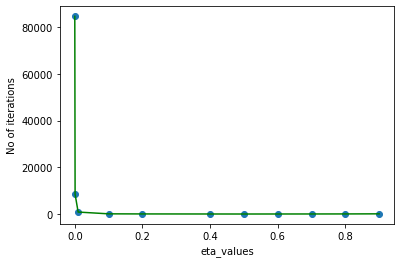

In [13]:
plt.plot(step_length,iter_list,color = "g")
plt.scatter(x=step_length,y = iter_list)
plt.xlabel("eta_values")
plt.ylabel("No of iterations");

Question 4 Observation : step length(eta value)
*  We can see that there is a drastic drop of no of iterations when eta changes from 0.0001 to 0.001 and keeps on decreasing and reached minimum no of iterations at eta 0.5 and increasing afterwards

* we can see that minimizer is approximately same for different values of eta values(step length) but as eta value is increasing the minimizer came close to global minimzer from left and reached global minimum at eta value = 0.5 and as eta is increasing now the minimizer value is increasing  and we can see the as minimizer is getting near towards(from left side) the exact minimzer value (-100,25) we can observe the objective function value is decreasing and when it reachs global minimizer the objective function value is zero and when the minimizer value is increasing(moving right from global minimzer) the function value is increasing . From this we can observe that function is convex at globabl minimizer and not flat.





5. [R] With τ = 10−5 and η = 0.1, we will study the behavior of the algorithm for different starting points.
Consider $x
_0$ ∈ {(10000, 10000),(500, 0),(0, 1000),(1, 1),(−500, −2)}. Prepare a table listing the final minimizer,
final objective function value and number of iterations taken by the algorithm to terminate for the different
starting points. Comment on your observations

In [14]:
t = (10)**(-5)
n = 0.1
df = pd.DataFrame(columns = ["Point","Minimizer","Objective function value","No of iterations"])
x_0 = [(10000,10000),(500,0),(0,1000),(1, 1),(-500,-2)]
for i in x_0:
  x,f,k= find_minimizer(np.array(i),t,n)
  df = df.append({"Point":i,"Minimizer":x,"Objective function value":evalf(np.array(x)),"No of iterations":k},ignore_index = True)

In [17]:
df

Point                                 Minimizer  \
0  (10000, 10000)    [-99.9999967853026, 25.00000317491154]   
1        (500, 0)  [-99.99999565779666, 24.999999819074862]   
2       (0, 1000)  [-99.99999953683165, 25.000004515891483]   
3          (1, 1)  [-99.99999564327261, 24.999998964738047]   
4      (-500, -2)  [-100.0000045231285, 24.999999694688828]   

   Objective function value No of iterations  
0              2.041434e-11               98  
1              1.888746e-11               84  
2              2.060780e-11               86  
3              2.005284e-11               76  
4              2.055191e-11               82

Question 5 Observations: 

|index|Point|Minimizer|Objective function value|No of iterations|
|---|---|---|---|---|
|0|10000,10000|\[-99\.99999679  25\.00000317\]|2\.0414342669998657e-11|98|
|1|500,0|\[-99\.99999566  24\.99999982\]|1\.888746375147865e-11|84|
|2|0,1000|\[-99\.99999954  25\.00000452\]|2\.060780080476227e-11|86|
|3|1,1|\[-99\.99999564  24\.99999896\]|2\.0052840841640608e-11|76|
|4|-500,-2|\[-100\.00000452   24\.99999969\]|2\.055190630073527e-11|82|

from the table we can see that  no of iterations are almost similar but we can see that as the strating point goes nearer to minimizer the no of iterations keeps on decreasing

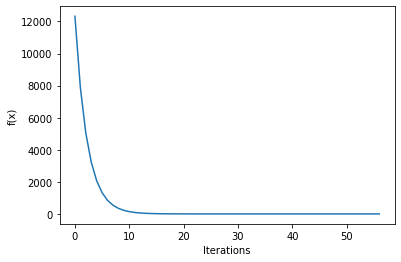

In [16]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(fvals_ret)
plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.show()